Introducción 

A la tienda de videojuegos Ice le interesa saber sobre el consumo de las regiones en materia de juegos. Cuales plataformas y géneros de juegos han sido los más exitosos a través del tiempo.

Un algoritmo de análisis de datos convencional conlleva pasos de limpieza y exploración de los datos (I), análisis (II) y extraer conclusiones del tema (III). 

(I) Pasos para Limpieza y Exploración de Datos

1. Instalar librerías
2. Importar los Datos
3. Revisar su composición y tipos de datos. 
4. Manejo de valores ausentes y tipos de datos errados. 

In [1]:
#Paso 1-Instalar y/o importación de librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import mannwhitneyu
import math as mt
import seaborn as sns
import matplotlib.cm as cm


In [2]:
#Paso 2 -importar datos
datos_juegos_ice = pd.read_csv("games.csv")

In [3]:
#Paso 3-Revisar composición y tipos de datos

datos_juegos_ice.info()

display(datos_juegos_ice.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#Observaciones y acciones correctivas sobre la composición y tipos de datos. 
Composición:
Los datos de juegos de ice consisten en 16715 registros con 11 columnas.

Algunas columnas contienen valores nulos:
nombre, año de liberación, género, puntuación de críticos, puntuación por usuarios y clasificación ESRB. 

Cambios sobre tipos de datos. 
Year of release es un float cuando debería ser entero. 
Critic score y user score están en float y objeto. Podrían ser llevados ambos a float y tener la misma base, base 100. 
Se considerará que la puntuación sea de la misma base para normalizar o poder compararlos durante los análisis. 

Otras correcciones: 
Los nombres de las columnas no siguen el formato snake_case por lo cual se corregirán. 

Enriquecimientos
(I) Preparación de datos
1. Corregir formato de columnas a snakecase.
2. Imputar o retirar valores nulos. 
3. Asegurar uso de tipos de datos apropiado.
4. Generar una columna con el total de ventas: "total_sales": suma de las ventas de todas las regiones

1. Corrección de nombres de columnas a formato snake case. 

In [4]:
#Corrección de nombres de columnas a formato snake case. 
#Revisar columnas: 
print("Columnas previo a aplicar formato snake case:")
print(datos_juegos_ice.columns)
#Columnas: #'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
#'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'. #Tiene mayúsculas a remover meramente. 

#Abrir una lista donde se guardarán los nombres corregidos

columns_fixed = []
for col in datos_juegos_ice.columns: 
    columns_fixed.append(col.lower())
#print(columns_fixed)  #valores adecuados #Se comentó porque ya queda como redundante. 
#Reemplazar los nombres de las columnas con la lista de valores de las columnas en snake_case
datos_juegos_ice.columns = columns_fixed
print()
print("Columnas posterior a aplicar formato snake case:")
print(datos_juegos_ice.columns) #Mayúsculas en las columnas del marco de datos arreglados

Columnas previo a aplicar formato snake case:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Columnas posterior a aplicar formato snake case:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


En el resultado de la segunda impresión de las columnas del marco de datos ya se ven los nombres de las plataformas en formato snake case. 

2. Manejo de valores nulos y tipos de datos


In [5]:
#Manejo de valores nulos
#Columnas con NAs: nombre, año de liberación, género, puntuación de críticos, puntuación por usuarios y puntuación general.

#Revisión de NAs. 
print("Tasa de na's por columna previo a imputar o retirar nulos:")
print(datos_juegos_ice.isna().mean())
#Básicamente 2 registros faltantes de nombre, 269 de año de liberación un 16% de los datos, 2 registros para género, un 51% (8578) de datos faltantes para puntaje por críticos y 40% (6701, 6766 respectivamente) para puntaje por usuario y general. 
print()
print("Cantidad de na's por columna previo a imputar o retirar nulos:")
print(datos_juegos_ice.isna().sum())

#Revisión de duplicados
print("Revisión de duplicados:")
print(datos_juegos_ice.duplicated().sum())

Tasa de na's por columna previo a imputar o retirar nulos:
name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Cantidad de na's por columna previo a imputar o retirar nulos:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
Revisión de duplicados:
0


Básicamente hay 2 registros faltantes de nombre, 269 de año de liberación un 16% de los datos, 2 registros para género, un 51% (8578) de datos faltantes para puntaje por críticos y 40% (6701, 6766 respectivamente) para puntaje por usuario y general. Sin duplicados. 

Acciones correctivas de imputación o retirar información.

1. Eliminar los 2 registros con información faltante para nombre y género debido a su aporte mínimo (.01%). 

2. Imputar o asignar valores atípicos para los valores faltantes para puntaje crítico, puntaje por usuario y general. 

In [6]:
#Eliminar valores faltantes 
#Para nombre y género. 
print("Registros con valores nulo para nombres y género:")
display(datos_juegos_ice.loc[datos_juegos_ice["name"].isna()]) #Son los mismos 2 que les falta género. 
datos_juegos_ice = datos_juegos_ice.dropna(subset= ["name"]) 
print()
print("Confirmación de eliminación de registros na en nombre y género")
display(datos_juegos_ice.loc[datos_juegos_ice["name"].isna()]) #Remoción confirmada de los 2 registros. 
#display(datos_juegos_ice.loc[datos_juegos_ice["genre"].isna()]) #Redundante el de género. Impresión sale en otro display vacío por eso se hizo nota.  

#Valores nulos atípicos: tbd. 
#Tbd a nulos
print("Exploración de nulos atípicos en puntaje por usuarios: 'tbd' (to be determined; a ser determinado).")
user_score_tbd_nulos = datos_juegos_ice[datos_juegos_ice["user_score"] == "tbd"].shape[0] #
print("Nulos atípicos: 'tbd': ", user_score_tbd_nulos) #2424 tbd a ser vueltos nulos. 
datos_juegos_ice.loc[datos_juegos_ice["user_score"] == "tbd", "user_score"] = np.nan 
nulos_tbd_post_imputacion_a_nulos = datos_juegos_ice.loc[datos_juegos_ice["user_score"] == "tbd", "user_score"].count()
print(f"Nulos tbd posterior a tratarlos: {nulos_tbd_post_imputacion_a_nulos}")
print()
#Exploración de nulos en columnas critic_score, user_score, rating
critic_score_nulos = datos_juegos_ice[datos_juegos_ice["critic_score"].isna()].shape[0] #8576
user_score_nulos = datos_juegos_ice[datos_juegos_ice["user_score"].isna()].shape[0] #9123
rating_nulos = datos_juegos_ice[datos_juegos_ice["rating"].isna()].shape[0] #6764
print(f"Nulos en critic_score: {critic_score_nulos}, en user_score: {user_score_nulos}, en rating: {rating_nulos}.") #Corroborar números de nulos a remover.
#Imputación de nulos a valores atípicos. 999 y "None" como str. 
datos_juegos_ice.loc[datos_juegos_ice["critic_score"].isna(), "critic_score"] = 999
datos_juegos_ice.loc[datos_juegos_ice["user_score"].isna(), "user_score"] = 999
datos_juegos_ice.loc[datos_juegos_ice["rating"].isna(), "rating"] = "None"
print()
critic_score_nulos = datos_juegos_ice[datos_juegos_ice["critic_score"].isna()].shape[0] #
user_score_nulos = datos_juegos_ice[datos_juegos_ice["user_score"].isna()].shape[0] #
rating_nulos = datos_juegos_ice[datos_juegos_ice["rating"].isna()].shape[0] #
print(f"Nueva revisión de nulos en critic_score: {critic_score_nulos}, en user_score: {user_score_nulos}, en rating: {rating_nulos}.") #Sin nulos.

#Manejo de nulos de columna: Year of release. Valor: nan. Son 269 valores un 1.6% del total de datos. Se eligirá remover del análisis. Los valores originales siempre se pueden recuperar del documento original. 
#print(datos_juegos_ice["year_of_release"].isna().sum()) #269
datos_juegos_ice.dropna(subset=["year_of_release"], inplace= True) #269

#Valores distintos por columna. Quiero revisar valores atípicos a ser reemplazados. Valores que no correspondan a la columna como no numéricos en numéricos o numéricos en strings previo a entrar a cambiar los tipos de datos.
print()
for col in datos_juegos_ice.columns:
    print()
    print(f"Valores únicos en la columna {col}: {datos_juegos_ice[col].unique()}")
    
#Se observó "tbd en user_score" será reemplazado por nulos en la sección de manejo de nulos. 2424 valores fueron reemplazados por nulos.
#Se observó el valor nan en año. Eran los 269 valores nulos que fueron removidos. 1.6% del marco de datos. 

print("Corroboración de ausencia de na´s en el marco de datos:")
print(datos_juegos_ice.isna().mean()) #Confirmación de remoción e imputación de nulos. 0 nulos en todas las columnas. 

Registros con valores nulo para nombres y género:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



Confirmación de eliminación de registros na en nombre y género


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Exploración de nulos atípicos en puntaje por usuarios: 'tbd' (to be determined; a ser determinado).
Nulos atípicos: 'tbd':  2424
Nulos tbd posterior a tratarlos: 0

Nulos en critic_score: 8576, en user_score: 9123, en rating: 6764.

Nueva revisión de nulos en critic_score: 0, en user_score: 0, en rating: 0.


Valores únicos en la columna name: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Valores únicos en la columna platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Valores únicos en la columna year_of_release: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]

Valores únic

Se removieron mediante eliminación e imputación con valores atípicos 999 o "None" todos los valores nulos. Observable en el último print. Último resultado previo. 

3. Corrección de tipos de datos. 

In [7]:
#Corrección de tipos de datos. 
print("Evidencia de year_of_release como float y user_score como objeto:")
datos_juegos_ice.info()
print()
#1 year of release de float a int. 
datos_juegos_ice["year_of_release"] = datos_juegos_ice["year_of_release"].astype(int)
print("Corroboración de year_of_release a int:")
print(datos_juegos_ice["year_of_release"].head()) #int corroborado. 
print()

#user_score a float. 
datos_juegos_ice["user_score"] = datos_juegos_ice["user_score"].astype(float)
print("Corroboración de cambio de user_score a float:")
print(datos_juegos_ice["user_score"].head()) #float corroborado

#opcional. Volver misma escala el puntaje por críticos y por usuarios. críticos es base 100 y usuarios base 10.
#Se hizo en el análisis de hipótesis al momento. 



Evidencia de year_of_release como float y user_score como objeto:
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB

Corroboración de year_of_release a int:
0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Corroboración de cambio de user_score a float:
0    

4. Añadir columna de ventas totales.

In [8]:
#Preparación de datos: Añadir columna de total de ventas
print("Ejemplo de marco de datos sin la columna ventas totales:")
display(datos_juegos_ice.head())
#columna de total de ventas. suma de na_sales, eu_sales, jp_sales, other_sales. 
datos_juegos_ice["total_sales"] = datos_juegos_ice["na_sales"] + datos_juegos_ice["eu_sales"] + datos_juegos_ice["jp_sales"] +datos_juegos_ice["other_sales"]
print()
print("Ejemplo de marco de datos con la columna ventas totales:")
display(datos_juegos_ice.head()) #Corroboración de columna nueva: total_sales. Total sales confirmed. 


Ejemplo de marco de datos sin la columna ventas totales:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999.0,999.0,None
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999.0,999.0,None



Ejemplo de marco de datos con la columna ventas totales:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999.0,999.0,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999.0,999.0,None,31.38


(II) Análisis de datos. 

1. Distribución de lanzamientos a través del tiempo o años. 

2. Revisión de ventas por plataforma. ¿Cuáles plataformas son líderes en ventas? 

3. Distribución a través del tiempo de ventas por plataforma. ¿hay tendencia de duración en el éxito? 

4. Comparación de ventas totales por plataforma en gráfico de caja. ¿Hay diferencias en ventas? 

5. Gráfico de dispersión y reseñas. Hay correlación entre reseñas y ventas? 

6. Juegos por género y géneros más rentables. 

7. Perfil por región. 5 plataformas principales por región. 5 géneros principales. Clasificaciones ESRB y ventas. 



1. Distribución de lanzamientos a través del tiempo o años.

Juegos lanzados por año:


,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14



Media, mediana y desviación estándar de cantidad de juegos liberados por año:
Media: 444.43243243243245, mediana: 338.0, Desv. est: 451.60433398548605.

Gráfico de distribución de juegos liberados por año


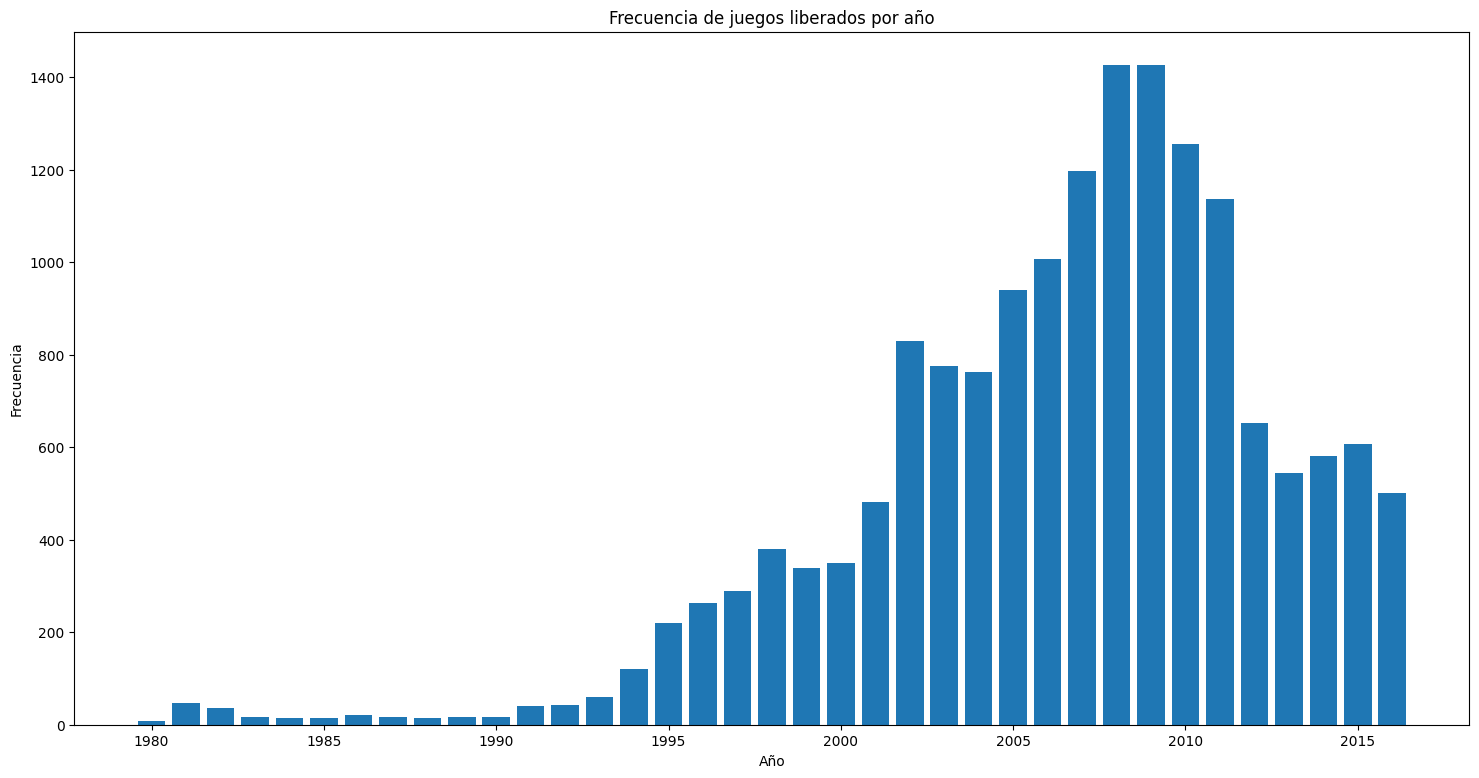

In [9]:
#Análisis de datos

#Distribución de lanzamientos a través del tiempo o años. 
#Para una distribución de lanzamientos a través de los años se requiere contar por año los registros y demostrarlo graficamente, un histograma considerando que hay muchos años debería bastar. 
#Limitante del histograma es que se generan rangos. Y es posible que no se rastree en primera instancia el año específico con mayor moda sino los rangos de años con mayores modas. 

#Alternativa gráfico de barras con 36 barras. 1 para cada año. 

#Conteo de juegos lanzados por año. 
datos_juegos_ice_distrib_barra = datos_juegos_ice["year_of_release"].value_counts().sort_index().reset_index(name="count")
print("Juegos lanzados por año:")
display(datos_juegos_ice_distrib_barra.head()) #corroborar estructura de datos. 
#Estadística descriptiva. Media, mediana, varianza, desviación estándar. 
media_liberacion_por_año = datos_juegos_ice_distrib_barra["count"].mean()
mediana_liberacion_por_año = datos_juegos_ice_distrib_barra["count"].median()
var_liberación_año = datos_juegos_ice_distrib_barra["count"].var()
desv_est_liberación_año = mt.sqrt(var_liberación_año)
print()
print("Media, mediana y desviación estándar de cantidad de juegos liberados por año:")
print(f"Media: {media_liberacion_por_año}, mediana: {mediana_liberacion_por_año}, Desv. est: {desv_est_liberación_año}.")
print()
print("Gráfico de distribución de juegos liberados por año")
plt.figure(figsize=(18, 9))
plt.bar(datos_juegos_ice_distrib_barra["year_of_release"], datos_juegos_ice_distrib_barra["count"])
plt.title("Frecuencia de juegos liberados por año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()

Interpretación de la distribución de liberación de juegos a través de los años:

La distribución de liberación de videojuegos tiene un sesgo hacia la derecha lo que significa que la mayoría de datos tienen un valor menor a la media. 
Esto refleja que en los primeros años se liberaban pocos juegos y fueron aumentando a través del tiempo. El 50% de los datos o mediana es de tan solo 338 juegos liberados.

Por otra parte, en los años de oro para liberación de juego de 2002 a 2011 se liberaban casi 3 a 4 veces más de juegos por año comparado a la mediana de ahí la observable alta variabilidad dado por la desviación estándar de 451 juegos.

2. Revisión de ventas por plataforma. ¿Cuáles plataformas son líderes en ventas? 

In [10]:
#Revisión de ventas por plataforma. ¿Cuáles plataformas son líderes en ventas? 
datos_juegos_ice_ventas_plataforma = datos_juegos_ice.groupby("platform")["total_sales"].sum().sort_values(ascending=False).reset_index(name="sales_per_platform")
print("Ventas en millones de dólares de mayor a menor por plataforma:")
print(datos_juegos_ice_ventas_plataforma) #Eje total sales está en millones de dólares estadounidenses
print()
print("Las top 5 plataformas líderes en ventas son: PS2, X360, PS3, Wii, DS")

Ventas en millones de dólares de mayor a menor por plataforma:
   platform  sales_per_platform
0       PS2             1233.56
1      X360              961.24
2       PS3              931.34
3       Wii              891.18
4        DS              802.78
5        PS              727.58
6       PS4              314.14
7       GBA              312.88
8       PSP              289.53
9       3DS              257.81
10       PC              255.76
11       GB              254.43
12       XB              251.57
13      NES              251.05
14      N64              218.01
15     SNES              200.04
16       GC              196.73
17     XOne              159.32
18     2600               86.48
19     WiiU               82.19
20      PSV               53.81
21      SAT               33.59
22      GEN               28.35
23       DC               15.95
24      SCD                1.86
25       NG                1.44
26       WS                1.42
27     TG16                0.16
28      3

3. Distribución a través del tiempo de ventas por plataforma. ¿hay tendencia de duración en el éxito? 


Ventas por plataforma por año: (muestra de 5 resultados)
  platform  year_of_release  total_sales_platform_year
0     2600             1980                      11.38
1     2600             1981                      35.68
2     2600             1982                      28.88
3     2600             1983                       5.84
4     2600             1984                       0.27

Gráfico de barras apiladas sobre ventas por plataforma por año:


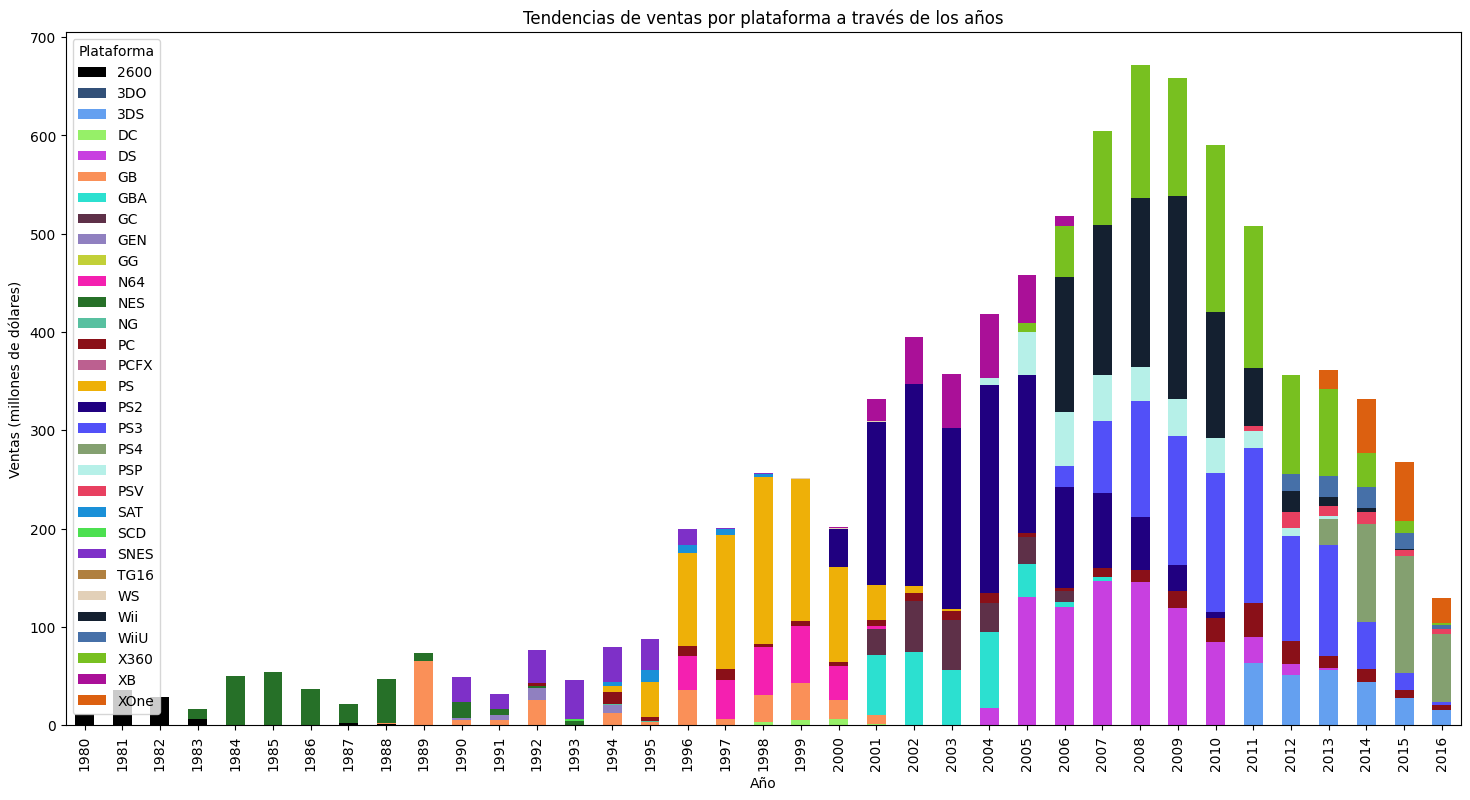

In [11]:
#Distribución a través del tiempo de ventas por plataforma. ¿hay tendencia de duración en el éxito? 
#Agrupar por plataforma y año. Medir total sales. 
datos_ventas_por_plataforma_por_año = datos_juegos_ice.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index(name="total_sales_platform_year")
print()
print("Ventas por plataforma por año: (muestra de 5 resultados)") #Para corroborar estructura
print(datos_ventas_por_plataforma_por_año.head())

#Graficar. 
#Lógica de selección de gráfico: 
#Lógica: ¿Qué gráfico? Lineas para ver tendencias de momentos de grandes ventas en el tiempo por plataforma. Los años de alza de cada uno. 
#Resultado: Lineplot fue un gráfico muy desorganizado. 

#Código de líneas
#plt.figure(figsize=(18, 9))
#sns.lineplot(data = datos_ventas_por_plataforma_por_año, x = "year_of_release", y="total_sales_platform_year", hue="platform")
##sns.barplot(data = datos_ventas_por_plataforma_por_año, x = "year_of_release", y="total_sales_platform_year", hue="platform") #con este cambio se pueden observar gráficas diminutas. Tampoco óptimo. 
#plt.title("Tendencias de ventas por plataforma a través de los años")
#plt.xlabel("Año")
#plt.ylabel("Ventas (millones de dólares)")
#plt.legend(title = "Plataforma")
#plt.show() ##código descartado-gráfico de líneas. 

#Resultado: barplot al ser tantas se observa muy poco las tendencias. 
#A intentar: Apiladas podría ser que se perciba mejor las plataformas dominantes. Se hará un gráfico apilado
#Resultado: Gráfico apilado fue útil para ver tendencias de líderes en ventas por plataforma a través de los años. Limitante colores similares entre distintas plataformas. 
#Alternativo. Gráfico de áreas. Distribuciones por plataforma. 

#Gráfico apilado
#Agrupar plataformas por columnas. 
#Modificar colores buscando mayor distinción entre plataformas. Sigue sin ser suficiente distinción. 
print()
print("Gráfico de barras apiladas sobre ventas por plataforma por año:")
ventas_año_plataforma_a_columnas = datos_ventas_por_plataforma_por_año.pivot(index="year_of_release", columns= "platform", values="total_sales_platform_year")
#Colores variados buscando distinguir las plataformas lider. 
num_colores = len(ventas_año_plataforma_a_columnas.columns)

# Función para generar colores separados (en formato hexadecimal)
def generar_colores(num_colores):
    colores = []
    for i in range(num_colores):
        # Generar un color RGB con separación fija
        r = (i * 50) % 256  # Mantener el valor entre 0 y 255
        g = (i * 80) % 256  # Mantener el valor entre 0 y 255
        b = (i * 120) % 256  # Mantener el valor entre 0 y 255
        colores.append(f'#{r:02x}{g:02x}{b:02x}')  # Convertir a formato hexadecimal
    return colores

# Generar los colores
colores = generar_colores(num_colores)

ventas_año_plataforma_a_columnas.plot(kind= "bar", stacked=True, figsize= (18, 9), color = colores)
plt.title("Tendencias de ventas por plataforma a través de los años")
plt.xlabel("Año")
plt.ylabel("Ventas (millones de dólares)")
plt.legend(title = "Plataforma")
plt.show()

Tendencias de liderazgo por ventas a través de los años en las plataformas. 

Hay un rango de 3 a 7 años de dominancia del mercado por plataforma que sostuvo liderazgo del mercado.

Las plataformas líderes a través del tiempo fueron 2600 en 1980, NES y SNES de 1983 a 1996 (6 y 7 años respectivamente) seguido de PlayStation (PS) por 4 años, finalizando con la época de XBOX-XBOX360 y Xbox one líderes por 16 años, 6 años por consola y los últimos 4 años medidos para Xbox one.  

Cabe destacar: En la época de dominio del mercado por XBOX los segundos lugares fueron PS2 y wii. 

4. Comparación de ventas totales por plataforma en gráfico de caja. 

Muestra para revisar estructura de la agrupación por plataforma y años:
  platform  year_of_release  ventas_por_plataforma_por_año
0     2600             1980                          11.38
1     2600             1981                          35.68
2     2600             1982                          28.88
3     2600             1983                           5.84
4     2600             1984                           0.27


Estadísticas descriptivas para ventas por plataforma por año:


,platform,promedio_ventas,mediana_ventas,varianza_ventas,desviacion_estandar_ventas
16,PS2,102.796667,89.705,6305.269861,79.405729
17,PS3,84.667273,107.360,2985.263462,54.637565
26,Wii,81.016364,59.650,6262.558745,79.136330
28,X360,80.103333,91.995,3304.457152,57.484408
18,PS4,78.535000,84.625,1645.755900,40.567917
4,DS,72.980000,85.020,3803.578040,61.673155
15,PS,72.758000,65.330,4013.439507,63.351713
2,3DS,42.968333,47.560,334.094817,18.278261
30,XOne,39.830000,40.110,412.657667,20.313977
6,GBA,39.110000,45.265,1073.758514,32.768255



Gráfico de distribuciones de ventas por plataforma a través de los años:


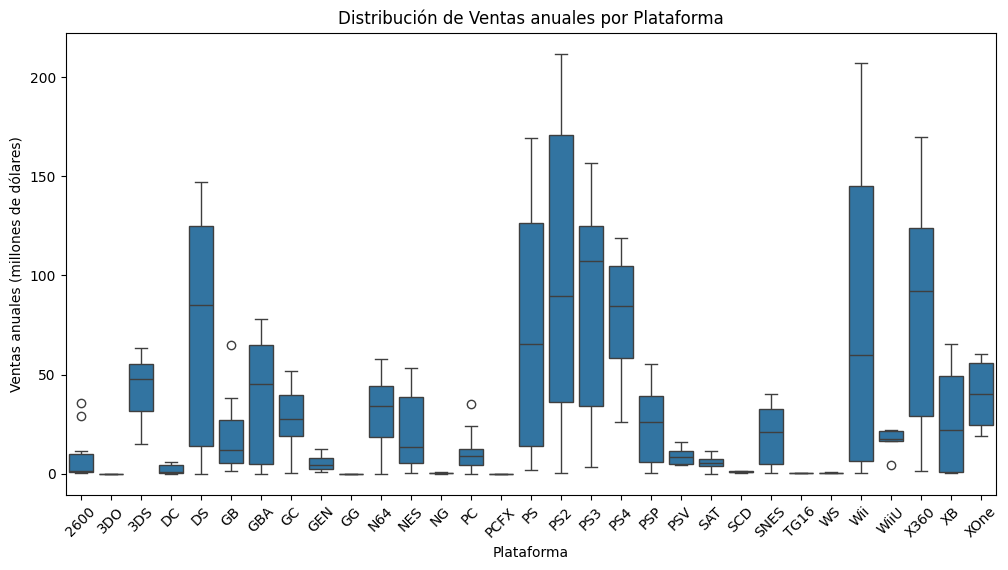

In [12]:
#Comparación de ventas totales anuales por plataforma en gráfico de caja. ¿Hay diferencias en ventas? 
#Agrupación por platform y años. Las ventas anuales se usan para graficar en boxplot. 
ventas_plataforma_para_boxplot = datos_juegos_ice.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index(name="ventas_por_plataforma_por_año")
print("Muestra para revisar estructura de la agrupación por plataforma y años:")
print(ventas_plataforma_para_boxplot.head())
print()

#Medidas de tendencia central. Media y Mediana. de ventas por plataforma. 
promedio_contribucion_plataforma = ventas_plataforma_para_boxplot.groupby("platform")["ventas_por_plataforma_por_año"].mean()
mediana_contribucion_plataforma = ventas_plataforma_para_boxplot.groupby("platform")["ventas_por_plataforma_por_año"].median()
varianza_contribucion_plataforma = ventas_plataforma_para_boxplot.groupby("platform")["ventas_por_plataforma_por_año"].var()
desviacion_estandar_plataforma = ventas_plataforma_para_boxplot.groupby("platform")["ventas_por_plataforma_por_año"].std()
estadisticas_plataforma = pd.DataFrame({
    "promedio_ventas": promedio_contribucion_plataforma,
    "mediana_ventas": mediana_contribucion_plataforma,
    "varianza_ventas": varianza_contribucion_plataforma,
    "desviacion_estandar_ventas": desviacion_estandar_plataforma
}).reset_index()

# Ordenar por promedio
estadisticas_plataforma = estadisticas_plataforma.sort_values(by="promedio_ventas", ascending=False)
print()
print("Estadísticas descriptivas para ventas por plataforma por año:")
display(estadisticas_plataforma)
print()



#Gráfico de caja o de bigotes. 
print("Gráfico de distribuciones de ventas por plataforma a través de los años:")
plt.figure(figsize=(12, 6))
#En este gráfico se observa muy abajo las medias de ventas por plataforma y hay valores grandes. Para observar mejor se manejará el eje y en escala logarítmica.
sns.boxplot(data = ventas_plataforma_para_boxplot, x = "platform", y= "ventas_por_plataforma_por_año")
#ax.set_yscale("log")
#ax.set_ylim(0.1, 100)  # Ajustar el rango del eje Y
#ticks = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 80, 100]  # Ticks personalizados
#ax.set_yticks(ticks)
#ax.set_yticklabels([f"{tick:.3f}" for tick in ticks])
plt.title("Distribución de Ventas anuales por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas anuales (millones de dólares)")
plt.xticks(rotation = 45)
plt.show()

Interpretación de la distribución de ventas por plataforma en gráfico de caja

Este gráfico consiste en la comparación de la distribución de ventas anuales por cada plataforma, cada dato es un año y entre todos los años para una plataforma componen una caja con sus bigotes.

Aquellas plataformas que se elevan en el eje y o ventas en millones de dólares son las más rentables, información extra es si la mediana está elevada se sabe que la mitad de sus años ha estado arriba de un valor de dólares percibidos. 
Las medianas de ventas a través de los años más grandes son las de PS3, X360, PS2, DS, PS4. Es decir que son los líderes en sostener valores más altos a través de los años. 

Del gráfico podemos observar en el inferior que las plataformas sin éxitos en los años han sido 3DO, GG, NG, PCFX, SCD, TG16 y WS. Sorprendente que ni siquiera los conozco. 

El promedio por otra parte considera los altos y bajos y nos permite saber que PS2, PS3, WII, X360 y PS4 son grandes contribuidores de ventas. 

Asimismo, previamente se había explorado que de ventas totales (es decir no considerando por año sino todos juntos): PS2, X360, PS3, Wii y DS han sido las plataformas líder en cantidad de millones de dólares recaudados. 

5. Gráfico de dispersión y reseñas. Hay correlación entre reseñas y ventas? 

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
(16444, 3)
Revisión de estructura de datos seleccionados:


,total_sales,critic_score,user_score
0,82.54,76.0,8.0
1,40.24,999.0,999.0
2,35.52,82.0,8.3
3,32.77,80.0,8.0
4,31.38,999.0,999.0


Posterior a remoción de valores atípicos (999) de reseñas por críticos:
   total_sales  critic_score  user_score
0        82.54          76.0         8.0
2        35.52          82.0         8.3
3        32.77          80.0         8.0
6        29.80          89.0         8.5
7        28.91          58.0         6.6
Posterior a remoción de valores atípicos (999) de reseñas por usuario y multiplicado por 10 para normalizar la escala con puntaje de críticos:
   total_sales  critic_score  user_score
0        82.54          76.0        80.0
2        35.52          82.0        83.0
3        32.77          80.0        80.0
6        29.80          89.0        85.0
7        28.91          58.0        66.0


Correlación entre ventas totales y reseñas de críticos: 0.24534884547411373. Correlación positiva moderada.

Correlación entre ventas totales y reseñas de usuarios: 0.08798399271321651. Correlación positiva débil.

La correlación entre ventas y reseñas por críticos es mejor predictor de aum

C:\Users\david\AppData\Local\Temp\ipykernel_26060\2943592103.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_reseñas_ventas_sin_atípicos_usuario["user_score"] = datos_reseñas_ventas_sin_atípicos_usuario["user_score"]*10 #modificar la escala para el análisis de correlación. Base 100 como la de los críticos


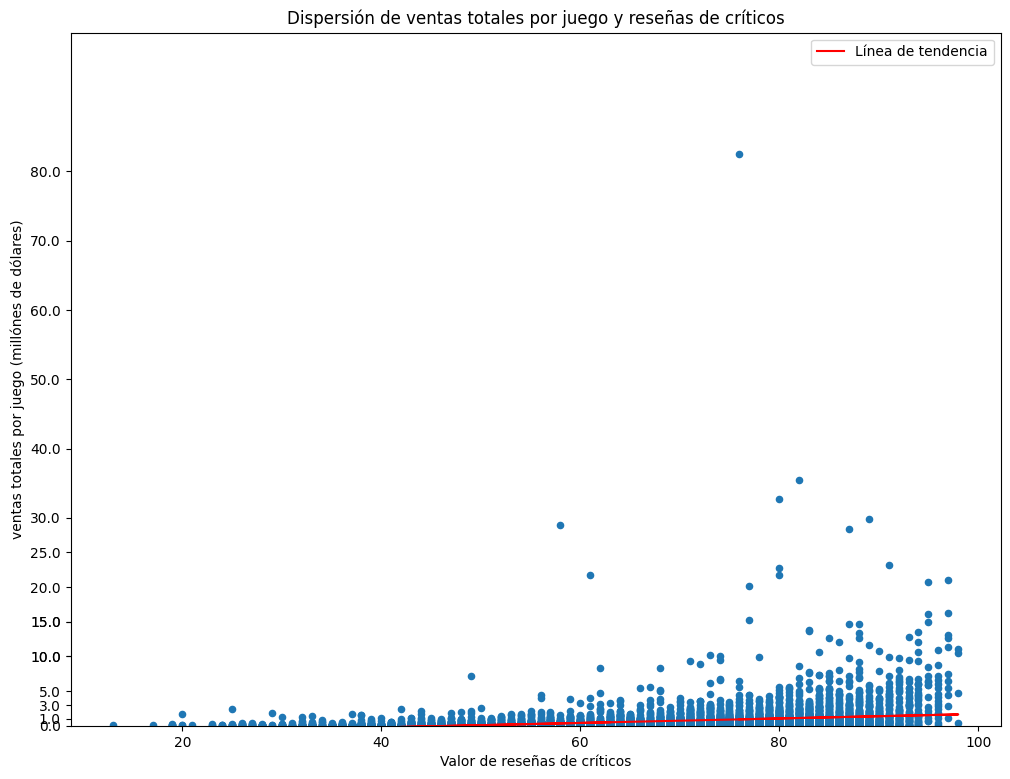

In [13]:
#Gráfico de dispersión y reseñas. Hay correlación entre reseñas y ventas? 
#Checar columnas. Extraer datos. sacar correlación estadística y visualizar en gráfico. Inclusive se puede integrar al gráfico.
datos_juegos_ice.columns #critic_score y total_sales cor. user_score y total_sales cor. 
datos_juegos_ice.info()
datos_reseñas_ventas = datos_juegos_ice[["total_sales", "critic_score",  "user_score"]]
print(datos_reseñas_ventas.shape)
print("Revisión de estructura de datos seleccionados:")
display(datos_reseñas_ventas.head()) #Tiene valores atípicos los 999 de la imputación de nulos. 
#Remoción de valores atípicos
datos_reseñas_ventas_sin_atípicos_usuario = datos_reseñas_ventas[datos_reseñas_ventas["user_score"]<= 9.9]
datos_reseñas_ventas_sin_atípicos_usuario["user_score"] = datos_reseñas_ventas_sin_atípicos_usuario["user_score"]*10 #modificar la escala para el análisis de correlación. Base 100 como la de los críticos
datos_reseñas_ventas_sin_atípicos_critico = datos_reseñas_ventas[datos_reseñas_ventas["critic_score"]<= 99.9]
print("Posterior a remoción de valores atípicos (999) de reseñas por críticos:")
print(datos_reseñas_ventas_sin_atípicos_critico.head()) #sin atípicos
print("Posterior a remoción de valores atípicos (999) de reseñas por usuario y multiplicado por 10 para normalizar la escala con puntaje de críticos:")
print(datos_reseñas_ventas_sin_atípicos_usuario.head()) #sin atípicos

cor_reseña_criticos_ventas = datos_reseñas_ventas_sin_atípicos_critico["total_sales"].corr(datos_reseñas_ventas_sin_atípicos_critico["critic_score"]) #se puede ahorrar una línea haciendo uso del marco de datos original.
cor_reseña_usuarios_ventas = datos_reseñas_ventas_sin_atípicos_usuario["total_sales"].corr(datos_reseñas_ventas_sin_atípicos_usuario["user_score"])
print()
print()
print(f"Correlación entre ventas totales y reseñas de críticos: {cor_reseña_criticos_ventas}. Correlación positiva moderada.")
print()
print(f"Correlación entre ventas totales y reseñas de usuarios: {cor_reseña_usuarios_ventas}. Correlación positiva débil.")
print()
print("La correlación entre ventas y reseñas por críticos es mejor predictor de aumento en ventas que aquella por críticas de usuario.")
#Se hará un gráfico de dispersión de la mejor correlación
#Título Dispersión de datos de ventas totales por juego y reseñas de críticos. 
#Eje X Valor de reseñas de críticos. Eje Y ventas totales (millónes de dólares). 

#El gráfico inicial estaba condensado hacia abajo por influencia de pocos valores de mayor ganancia. Se usará un logaritmo con valores específicos en el eje Y.
#Alternativo regular los ticks lineales
print()
print("Gráfico de dispersión de ventas totales por juego y reseñas de críticos")
plt.figure(figsize=(12, 9))
ax = plt.gca()
datos_reseñas_ventas_sin_atípicos_critico.plot(kind= "scatter", x="critic_score", y="total_sales", ax = ax)
#ax.set_yscale("log")
ax.set_ylim(0, 100)  # Ajustar el rango del eje Y
ticks = [0, 1, 3, 5, 10, 15, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]  # Ticks personalizados
ax.set_yticks(ticks)
ax.set_yticklabels([f"{tick:.1f}" for tick in ticks])
#Añadir línea de tendencia
x = datos_reseñas_ventas_sin_atípicos_critico["critic_score"]
y = datos_reseñas_ventas_sin_atípicos_critico["total_sales"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", label="Línea de tendencia")


plt.title("Dispersión de ventas totales por juego y reseñas de críticos")
plt.xlabel("Valor de reseñas de críticos")
plt.ylabel("ventas totales por juego (millónes de dólares)")
plt.legend()
plt.show()

Interpretación de la dispersión. 
Generalidades:
Ciertamente hay una relación positivo en que las reseñas de los críticos de mayor valor correspondan a juegos que hayan percibido mayores ventas. Por ejemplo: no se ven juegos de reseñas de críticos de 40 sobre 100 que ganen más de 2 millones de dólares. Son casos contados. 

Limitantes:
Por otra parte, los grandes éxitos en ventas, sobre todo aquellos sin una calificación por críticos positiva pueden irrumpir en la fuerza de la correlación. Es útil buscar más variables que impacten en el éxito en ventas como el género, plataforma o marketing para considerar las variables y modelar con mayor precisión el aumento en ventas.  Además de que permitiría tomar decisiones sobre la creación de juegos para pronunciar el ámbito lucrativo. 

6. Juegos por género. Géneros más rentables.

In [14]:
#Juegos por género. Géneros más rentables. 
#Cantidad de juegos por género. Agrupar por género y .count() con display. 
datos_juegos_ice.columns #genre, total_sales.
juegos_genero = datos_juegos_ice[["genre", "name"]].groupby("genre")["name"].count().reset_index(name="games_by_genre").sort_values(by="games_by_genre", ascending=False)
print("Cantidad de juegos por género en órden descendiente:")
print(juegos_genero)

ventas_por_genero = datos_juegos_ice[["genre", "total_sales"]].groupby("genre")["total_sales"].sum().reset_index(name="sales_by_genre").sort_values(by="sales_by_genre", ascending=False)
print("Ventas en millones de dólares por género de juegos:")
print(ventas_por_genero)

#Interesante cual hace más por proporción es decir por juego, no? 
promedio_ventas_por_juego_por_género = datos_juegos_ice[["genre", "name", "total_sales"]].groupby("genre")["total_sales"].mean().reset_index(name="mean_per_game_per_genre").sort_values(by="mean_per_game_per_genre", ascending= False)
print()
print("Top 10 géneros en ganancias elevadas por juego:")
print(promedio_ventas_por_juego_por_género.head(10))
lista_juegos_mayor_ganancia = ", ".join(promedio_ventas_por_juego_por_género["genre"].head(10))
print(f"Los 10 géneros que más dejan ventas por juego son: {lista_juegos_mayor_ganancia} ")

Cantidad de juegos por género en órden descendiente:
           genre  games_by_genre
0         Action            3307
10        Sports            2306
3           Misc            1721
7   Role-Playing            1481
8        Shooter            1296
1      Adventure            1293
6         Racing            1226
4       Platform             878
9     Simulation             857
2       Fighting             837
11      Strategy             673
5         Puzzle             569
Ventas en millones de dólares por género de juegos:
           genre  sales_by_genre
0         Action         1716.52
10        Sports         1309.67
8        Shooter         1041.36
7   Role-Playing          931.08
4       Platform          825.55
3           Misc          790.29
6         Racing          723.49
2       Fighting          442.66
9     Simulation          387.96
5         Puzzle          239.89
1      Adventure          233.33
11      Strategy          172.57

Top 10 géneros en ganancias elevadas

7. Preferencias por región de plataformas y géneros. 

In [19]:
#Perfil de preferencias por región
#Para cada región (NA, UE, JP) determina:

#Las cinco plataformas principales. 
##Describe las variaciones en sus cuotas de mercado de una región a otra.
#Los cinco géneros principales. Explica la diferencia.
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

#Aislar datos relevantes
#"platform", "genre", "na_sales", "eu_sales", "jp_sales", "rating"
datos_juegos_analisis_region = datos_juegos_ice[["platform", "genre", "na_sales", "eu_sales", "jp_sales","total_sales", "rating"]]

#Agrupación de datos por ventas. obtener top 5 plataformas y géneros por región (NA, UE, JP),

comparacion_general_mercado = {"mercado_na" : ((datos_juegos_analisis_region["na_sales"].sum())/datos_juegos_analisis_region["total_sales"].sum())*100, 
                               "mercado_eu" : ((datos_juegos_analisis_region["eu_sales"].sum())/datos_juegos_analisis_region["total_sales"].sum())*100,
                               "mercado_jp" : ((datos_juegos_analisis_region["jp_sales"].sum())/datos_juegos_analisis_region["total_sales"].sum())*100}
comparacion_general_mercado_df = pd.DataFrame(list(comparacion_general_mercado.items()), columns=["region", "market_share_percentage"])
print("Cuotas de mercado por región:")
display(comparacion_general_mercado_df)
print()


columns_regions = ["na_sales", "eu_sales", "jp_sales"]
df_5platforms_market_share_per_region = []
genre_market_share_per_region = []
rating_market_share_per_region = []
def algoritmo_analisis(x): 
    whole_market = x["total_sales"].sum()
    all_platform_sales = []
    genre_by_region = []
    rating_by_region = []
    for col in columns_regions:
        #Código para obtener las plataformas por región y organizados por mayores ventas. 
        platforms_sales = x.groupby("platform")[col].sum().reset_index(name = "sales_by_platform").sort_values(by = "sales_by_platform", ascending = False) #top 5 plataformas
        platforms_sales["platform_market_share"] = platforms_sales["sales_by_platform"]/ whole_market
        #Etiqueta de donde provienen los datos: na, eu, jp 
        platforms_sales["region"] = col.split("_")[0]
        all_platform_sales.append(platforms_sales.head()) #top 5 plataformas por region y contribucion de mercado
        #Integracion a un marco de datos unico de los top 5 plataformas por region 
    concat = pd.concat(all_platform_sales, ignore_index=True)
    df_5platforms_market_share_per_region.append(concat)
    for col in columns_regions:
        #Código para obtener las plataformas por región y organizados por mayores ventas. 
        genre_sales = x.groupby("genre")[col].sum().reset_index(name = "sales_by_region").sort_values(by = "sales_by_region", ascending = False) #top 5 plataformas
        genre_sales["genre_market_share"] = genre_sales["sales_by_region"]/ whole_market
        #Etiqueta de donde provienen los datos: na, eu, jp 
        genre_sales["region"] = col.split("_")[0]
        genre_by_region.append(genre_sales.head()) #top 5 plataformas por region y contribucion de mercado
        #Integracion a un marco de datos unico de los top 5 plataformas por region 
    concat_genre = pd.concat(genre_by_region, ignore_index=True)
    genre_market_share_per_region.append(concat_genre)
    for col in columns_regions:
        #Código para obtener las plataformas por región y organizados por mayores ventas. 
        rating_sales = x.groupby("rating")[col].sum().reset_index(name = "sales_by_region").sort_values(by = "sales_by_region", ascending = False) #top 5 ratings
        rating_sales["rating_market_share"] = rating_sales["sales_by_region"]/ whole_market
        #Etiqueta de donde provienen los datos: na, eu, jp 
        rating_sales["region"] = col.split("_")[0]
        rating_by_region.append(rating_sales.head()) #top 5 ratings por region y contribucion de mercado
        #Integracion a un marco de datos unico de los top 5 ratings por region 
    concat_rating = pd.concat(rating_by_region, ignore_index=True)
    rating_market_share_per_region.append(concat_rating)

algoritmo_analisis(datos_juegos_analisis_region)
print("Cuotas de mercado de las 5 plataformas populares por región:")
display(df_5platforms_market_share_per_region[0])
print("Top 5 géneros populares de videojuegos por región y su cuota en el mercado")
display(genre_market_share_per_region[0])
#print(type(df_5platforms_market_share_per_region))
df_5platforms_market_share_per_region = df_5platforms_market_share_per_region[0]
na_plataformas = df_5platforms_market_share_per_region[df_5platforms_market_share_per_region["region"] == "na"]
eu_plataformas = df_5platforms_market_share_per_region[df_5platforms_market_share_per_region["region"] == "eu"]
jp_plataformas = df_5platforms_market_share_per_region[df_5platforms_market_share_per_region["region"] == "jp"]

sum_na_market = na_plataformas["platform_market_share"].sum()*100
sum_eu_market = eu_plataformas["platform_market_share"].sum()*100
sum_jp_market = jp_plataformas["platform_market_share"].sum()*100
genre_market_share_per_region = genre_market_share_per_region[0]

na_generos = genre_market_share_per_region[genre_market_share_per_region["region"]=="na"]
eu_generos = genre_market_share_per_region[genre_market_share_per_region["region"]=="eu"]
jp_generos = genre_market_share_per_region[genre_market_share_per_region["region"]=="jp"]
#", ".join(na_plataformas["platform"])
print("El perfil de preferencias de plataformas por región es: ")
print(f"na:{", ".join(na_plataformas["platform"])}, eu:{", ".join(eu_plataformas["platform"])}, jp:{", ".join(jp_plataformas["platform"])} con participaciones de mercado de {sum_na_market}%, {sum_eu_market}%, {sum_jp_market}% respectivamente.")
print(f"Los géneros de juegos preferidos por región son {", ".join(na_generos["genre"])} para norteamericanos, {", ".join(eu_generos["genre"])} para unión europea y {", ".join(jp_generos["genre"])} para japón")

#Agrupación por rating
print(datos_juegos_ice["rating"].unique())
rating_market_share_per_region = rating_market_share_per_region[0]
rating_market_share_per_region = rating_market_share_per_region[rating_market_share_per_region["rating"]!="None"]
na_rating = rating_market_share_per_region[rating_market_share_per_region["region"]=="na"]
eu_rating = rating_market_share_per_region[rating_market_share_per_region["region"]=="eu"]
jp_rating = rating_market_share_per_region[rating_market_share_per_region["region"]=="jp"]

print(f"Las clasificaciones de juegos preferidos por región son {", ".join(na_rating["rating"])} para norteamericanos, {", ".join(eu_rating["rating"])} para unión europea y {", ".join(jp_rating["rating"])} para japón")



Cuotas de mercado por región:


,region,market_share_percentage
0,mercado_na,49.253889
1,mercado_eu,27.224634
2,mercado_jp,14.642453



Cuotas de mercado de las 5 plataformas populares por región:


,platform,sales_by_platform,platform_market_share,region
0,X360,595.74,0.067587,na
1,PS2,572.92,0.064998,na
2,Wii,486.87,0.055236,na
3,PS3,390.13,0.044261,na
4,DS,380.31,0.043147,na
5,PS2,332.63,0.037737,eu
6,PS3,327.21,0.037122,eu
7,X360,268.32,0.030441,eu
8,Wii,258.32,0.029307,eu
9,PS,212.39,0.024096,eu


Top 5 géneros populares de videojuegos por región y su cuota en el mercado


,genre,sales_by_region,genre_market_share,region
0,Action,863.17,0.097928,na
1,Sports,671.20,0.076148,na
2,Shooter,584.83,0.066350,na
3,Platform,444.44,0.050422,na
4,Misc,399.57,0.045332,na
5,Action,510.99,0.057972,eu
6,Sports,371.33,0.042128,eu
7,Shooter,314.52,0.035683,eu
8,Racing,234.49,0.026603,eu
9,Misc,210.60,0.023893,eu


El perfil de preferencias de plataformas por región es: 
na:X360, PS2, Wii, PS3, DS, eu:PS2, PS3, X360, Wii, PS, jp:DS, PS, PS2, SNES, 3DS con participaciones de mercado de 27.5228972688916%, 15.870334465197173%, 7.595664806446746% respectivamente.
Los géneros de juegos preferidos por región son Action, Sports, Shooter, Platform, Misc para norteamericanos, Action, Sports, Shooter, Racing, Misc para unión europea y Role-Playing, Action, Sports, Platform, Misc para japón
['E' 'None' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Las clasificaciones de juegos preferidos por región son E, T, M, E10+ para norteamericanos, E, M, T, E10+ para unión europea y E, T, M, E10+ para japón


Interpretación de Análisis del perfil de preferencias. 

Las plataformas populares para norteamérica son X360, PS2, Wii, PS3, DS. Y su cuota conjunta en el mercado total de videojuegos es de 27.5%. Bastante alta considerando que es solo una región. 
Las plataformas populares para eu son PS2, PS3, X360, Wii, PS. Y su cuota del mercado es 15.9%.
Las plataformas populares para japón son DS, PS, PS2, SNES, 3DS. Y su cuota del mercado es 7.6%.
En el análisis de consumo de juegos hasta el año 2016 ha predominado en norteamérica el xbox360 seguido del PS2. Mientras que en europa o unión europea es el PS2 y PS3 quienes lideran seguido del xbox360. Japón por otra parte es mayor consumidor del DS y en su momento del PS y hasta PS2. Sorprendente ver que no jugamos las mismas consolas al menos en cuanto a preferencias y por otra parte que norteamérica sostiene gran parte del mercado de juegos. 

Los géneros por otra parte. Tanto NA como UE prefieren acción, deporte y disparos como sus primero 3 juegos y varían solo en que en 4to género preferido los europeos prefieren las carreras mientras que los americanos las plataformas. Los japoneses por otra parte prefieren los juegos de roles y posteriormente acción y deporte. Los 3 prefieren categorias miscelaneas en 5to lugar. Los japoneses prefieren un distinto género. 

Asimismo son los mismas clasificaciones preferidas por las regiones (todos) E, (adolescentes) T, (mayores) M, (Mayores de 10) E10. Salvo que la preferencia de la unión europea en segunda mejor clasificación es mayores M y luego adolescentes T. 

(III) Los test de hipótesis se harán en 4 pasos

1. Definir las hipótesis y prueba a utilizar.

2. Aislar los datos relevantes. 

3. Verificar que cumplen con los requisitos. 

4. Ejecución de la prueba e interpretación de los resultados. 

In [20]:
#Tests de hipótesis
#1. Definir las hipótesis para verificar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
#Hipótesis nula: Las calificaciones promedio de los usuarios entre plataformas Xbox One y PC no difieren significativamente. 
#Hipótesis alternativa: Las calificaciones promedio de los usuarios  entre plataformas Xbox One y PC difieren significativamente. 
#Prueba elegida. 
#Intento: Test bilateral para 2 muestras. ttest_ind(). No satisfajo el requisito de estar normalmente distribuido. 
#Resultado: Mannwhitney

#2. Aislar los datos de plataformas Xone y PC así como los puntajes por usuario. 
user_score_platform = datos_juegos_ice[["platform", "user_score"]]
user_score_platform = user_score_platform[user_score_platform["user_score"]<= 9.9] #Remoción de atípicos
print(user_score_platform["platform"].unique())
user_score_platform_xbox = user_score_platform[user_score_platform["platform"] == "XOne"]
user_score_platform_pc = user_score_platform[user_score_platform["platform"] == "PC"]
display(user_score_platform_xbox.head())
display(user_score_platform_xbox.shape)
display(user_score_platform_pc.head())
display(user_score_platform_pc.shape)
#Definir significancia
alpha = 0.05

#3. Cumplir supuestos: normalidad y varianza homogénea entre muestras. Normalidad prueba de shapiro y varianza prueba de levene.
stat, pvalue = st.shapiro(user_score_platform_xbox["user_score"])
print(f"Valor shapiro para puntajes por usuario muestra xbox: {stat}, pvalue: {pvalue}")
stat, pvalue = st.shapiro(user_score_platform_pc["user_score"])
print(f"Valor shapiro para puntajes por usuario muestra pc: {stat}, pvalue: {pvalue}")
#Pval>0.05 = Parecen seguir una distribución normal. 
print("Los valores no son normales p<0.05 en ambos casos. Se continuará haciendo una prueba no paramétrica: Mannwhitney") #falló test de normalidad

#4. Prueba Mannwhitney 
resultados = mannwhitneyu(user_score_platform_xbox["user_score"], user_score_platform_pc["user_score"])
print()
print("Resultados de prueba Mannwhitney para verificar diferencias en puntajes por usuarios para Xbos y PC:")
if resultados.pvalue < 0.05: 
    print("Rechazar hipótesis nula")
    print("Las calificaciones promedio de los usuarios  entre plataformas Xbox One y PC difieren significativamente")
else: 
    print("La hipótesis nula no se rechaza")
    print("Las calificaciones promedio de los usuarios  entre plataformas Xbox One y PC no difieren significativamente")
print()
#1. Definir las hipótesis para verificar si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son distintas.
#Hipótesis nula: Las calificaciones de los usuarios entre géneros de acción y deportes no difieren significativamente.
#Hipótesis Alternativa: Las calificaciones de los usuarios entre géneros de acción y deportes difieren significativamente.
#Prueba elegida. Test bilateral para 2 muestras. ttest_ind()

#2. Aislas los datos.  
user_score_genre = datos_juegos_ice[["genre", "user_score"]]
user_score_genre["genre"].unique() #"Action", "Sports"
user_score_action = user_score_genre[user_score_genre["genre"] == "Action"]
user_score_sports = user_score_genre[user_score_genre["genre"] == "Sports"]

#3. Verificar normalidad y varianza homogénea. 
stat, pvalue = st.shapiro(user_score_action["user_score"])
print(f"Valor shapiro para puntajes genero acción: {stat}, pvalue: {pvalue}")
print("No hay normalidad pvalue <0.05 se hará Mannwhitney.")
#user_score_sports["user_score"]

#4 Prueba no paramétrica Mannwhitney para verificar diferencias en puntajes promedio entre géneros. 
resultados_2 = mannwhitneyu(user_score_action["user_score"], user_score_sports["user_score"])
print()
print("Resultados de prueba Mannwhitney para verificar diferencias en puntajes por usuarios para géneros acción y deporte:")
if resultados_2.pvalue < 0.05: 
    print("Rechazar hipótesis nula")
    print("Las calificaciones de los usuarios entre géneros de acción y deportes difieren significativamente.")
else: 
    print("La hipótesis nula no se rechaza")
    print("Las calificaciones de los usuarios entre géneros de acción y deportes no difieren significativamente.")
print()


['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


,platform,user_score
165,XOne,7.9
179,XOne,5.4
242,XOne,6.4
270,XOne,6.2
373,XOne,4.1


(182, 2)

,platform,user_score
85,PC,7.6
138,PC,7.3
192,PC,4.0
218,PC,8.2
284,PC,9.1


(755, 2)

Valor shapiro para puntajes por usuario muestra xbox: 0.9550558360108363, pvalue: 1.5250443611107256e-05
Valor shapiro para puntajes por usuario muestra pc: 0.9046631226922278, pvalue: 2.707679990702109e-21
Los valores no son normales p<0.05 en ambos casos. Se continuará haciendo una prueba no paramétrica: Mannwhitney

Resultados de prueba Mannwhitney para verificar diferencias en puntajes por usuarios para Xbos y PC:
Rechazar hipótesis nula
Las calificaciones promedio de los usuarios  entre plataformas Xbox One y PC difieren significativamente

Valor shapiro para puntajes genero acción: 0.6354611934207297, pvalue: 2.5263149803410827e-64
No hay normalidad pvalue <0.05 se hará Mannwhitney.

Resultados de prueba Mannwhitney para verificar diferencias en puntajes por usuarios para géneros acción y deporte:
Rechazar hipótesis nula
Las calificaciones de los usuarios entre géneros de acción y deportes difieren significativamente.



Conclusiones

I. Contexto de los datos y aspectos de preparación. 

Hay 16715 registros de juegos lanzados del año 1980 a 2016.
De preparación se imputaron y removieron valores nulos. Se aplicó formato snake_case a las columnas, se corrigieron tipos de datos y agregó información nueva y útil como ventas totales. 

II. Entendimientos de análisis y distribuciones. 

1. La liberación de los juegos a través del tiempo (1980 a 2016) tiene una mediana de 338 juegos anual alcanzado al rededor del año 1997. En promedio se lanzan 444 juegos sin embargo hay una variabilidad alta de 451 juegos (desviación estándar). Particularmente los años de mayor auge en liberación fueron de 2002 a 2011 con liberaciones de casi 2 a más de 3 veces el promedio, como si 2 a 3 años de liberación de juegos se diera en 1. Posterior al 2011 se estabilizan los lanzamientos en un rango de 400 a 600 por año. Los juegos más liberados son de acción, deporte, misceláneos, juegos de rol, disparos, aventura y carreras. 

2. Las plataformas de mayor venta total son PS2, X360, PS3, Wii y DS. En ventas por plataforma a través del tiempo se observa que cada plataforma dura en tendencia de 3 a 7 años. Habiendo solo 7 tendencias desde el año 1980 a 2016. Estos 7 fueron 2600 por 3 años, sistema de entretenimiento nintendo o NES y supersistema nintendo SNES por 6 y 7 años respectivamente (1983 a 1996), 4 años de play station y 16 años de versiones de xbox: xbox 6 años, x360 6 años y xbox one 4 años. Analizando las distribuciones los plataformas con ventas más estables y elevadas (medianas elevadas en distribucion de ventas) son PS3, X360, PS2, DS, PS4. Es decir que son los líderes en sostener valores más altos a través de los años. Aquellas que no tuvieron éxito son 3DO, GG, NG, PCFX, SCD, TG16 y WS. Sorprendente que ni siquiera los conozco. El promedio por otra parte considera los altos y bajos y nos permite saber que PS2, PS3, WII, X360 y PS4 son grandes contribuidores de ventas aún si de PS4 no se ha hablado.
 
3. Relación entre críticas y ventas. Hay una relación positiva moderada (pearson 0.24) entre aumento en valor de críticas y cantidad de ventas en millones de dólares. En contraste las críticas por los usuarios solo explican un 8% (3 veces menos) las ventas. La dispersión de los datos y valores atípicos explican que la linealidad sea moderada. Sería útil indagar sobre otras variables como mercadotecnia, plataforma o género para mejorar la capacidad predictora sobre las ventas. 

4. Mercado y Ventas. Del mercado total de videojuegos el 49.3% es consumido por norteamericanos seguido por un 27.2% por europeos y solo el 14.6% por japoneses. Los géneros de juegos de mayores ventas en general son acción, deporte, disparos, juego de roles y plataformas. 

III. Perfiles por región.

En cuanto a las preferencias por región sobre géneros hay una variación mínima si se contrastan sus 5 mayores preferencias. Los 3, tanto norteamérica como la unión europea y japón, prefieren acción, deporte y disparos en ese orden. La unión europea en cuarto lugar prefiere los juegos de carreras mientras que japón prefiere antes que los 3 conservados a los juegos de rol. Los juegos de plataforma también se encuentran entre los 5 más populares para japón y norteamérica. Las clasificaciones de juegos más consumidas están conservadas en las 3 regiones salvo que en europa se prefiere los juegos de clasificación para mayores (M) sobre los de adolescentes (T). En primer y último lugar están para todos (E) y para mayores de 10 (E10). ETME10 vs EMTE10.

Las plataformas preferidas por región X360, PS2, Wii, PS3 y DS en na, PS2, PS3, X360, WII y PS; en eu y DS, PS, PS2, SNES y 3DS en jp. Claramente las consolas líder no son las mismas entre regiones X360(na), PS2(eu) y DS(jp). 

IV. Pruebas de Hipótesis.

Las calificaciones hacia los juegos por los usuarios difieren tanto entre plataformas Xbox contra PC como entre géneros acción contra deporte. 

Ciertamente ahora se conoce sobre las tendencias en consumo de juegos. Cuanto consume cada región, que plataformas son las más usadas, cuales por región, los géneros preferidos así como las clasificaciones. 
